In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as smf
import numpy as np 
from sklearn.preprocessing import LabelEncoder

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.columns = startup.columns.str.replace(' ','')

In [4]:
startup.head()

,R&DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.isna().sum()

R&DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [6]:
startup.rename(columns={'R&DSpend':'RDSpend'},inplace=True)

In [7]:
startup.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
label_encoder = LabelEncoder()
startup["State"]=label_encoder.fit_transform(startup["State"])
st=startup
st.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
from sklearn.preprocessing import StandardScaler
std_sclr = StandardScaler()
st = std_sclr.fit_transform(st)

In [10]:
st = pd.DataFrame(st)
st.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [11]:
st.columns = ["RDSpend","Administration","MarketingSpend","State","Profit"]
st.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [12]:
st.corr()

,RDSpend,Administration,MarketingSpend,State,Profit
RDSpend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


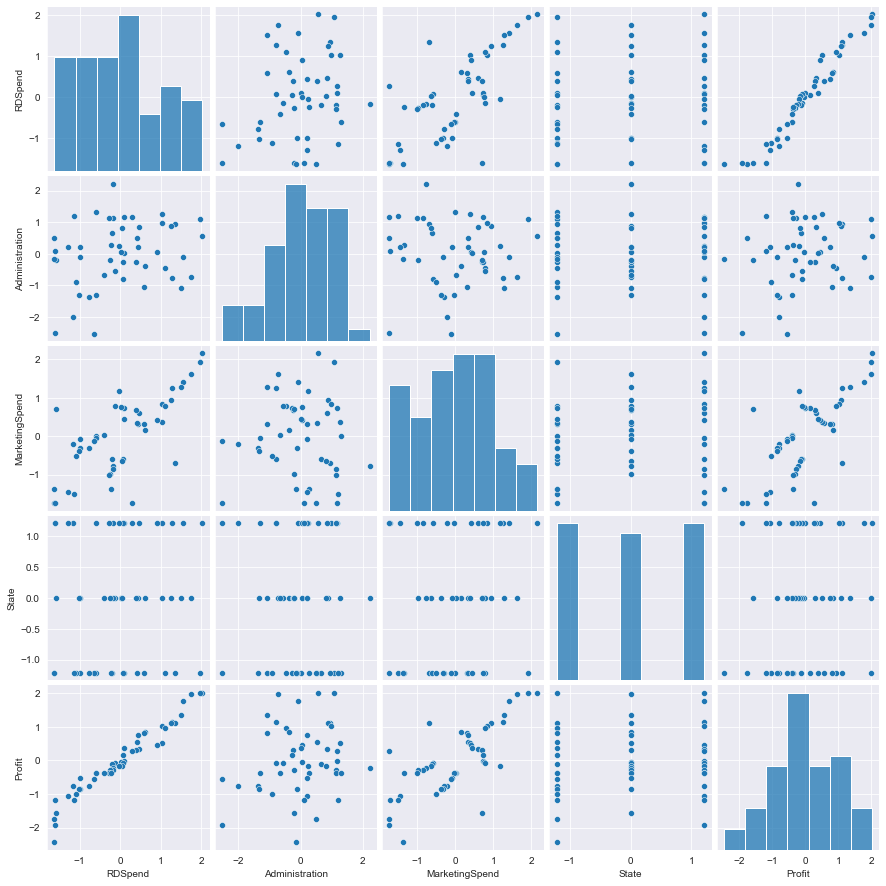

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(st)


In [14]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend+State' ,data=st).fit()


In [15]:
model.params

Intercept        -5.204170e-16
RDSpend           9.176307e-01
Administration   -1.864730e-02
MarketingSpend    8.260967e-02
State            -4.612912e-04
dtype: float64

In [16]:
# t and p values
print(model.tvalues, '\n',model.pvalues)


Intercept        -1.573033e-14
RDSpend           1.760862e+01
Administration   -5.199064e-01
MarketingSpend    1.636966e+00
State            -1.386519e-02
dtype: float64 
 Intercept         1.000000e+00
RDSpend           8.249206e-22
Administration    6.056771e-01
MarketingSpend    1.086131e-01
State             9.889988e-01
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 21 May 2021   Prob (F-statistic):           8.51e-29
Time:                        20:36:13   Log-Likelihood:                 4.3223
No. Observations:                  50   AIC:                             1.355
Df Residuals:                      45   BIC:                             10.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.033  -1.57e-14      1.000      -0.067       0.067
RDSpend            0.9176      0.052     17.609      0.000       0.813       1.023
Administration    -0.0186      0.036     -0.520      0.606      -0.091       0.054
MarketingSpend     0.0826      0.050      1.637      0.109      -0.019       0.184
State             -0.0005      0.033     -0.014      0.989      -0.067       0.067
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Simple Linear Regression Models

In [19]:
model1 = smf.ols(formula='Profit~RDSpend+MarketingSpend+State' ,data=st).fit()
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)  

Intercept        -1.585660e-14
RDSpend           1.901262e+01
MarketingSpend    1.906454e+00
State            -6.736930e-03
dtype: float64 
 Intercept         1.000000e+00
RDSpend           2.013984e-23
MarketingSpend    6.284954e-02
State             9.946539e-01
dtype: float64


In [20]:
model2=smf.ols('Profit~RDSpend+Administration+MarketingSpend',data = st).fit()  
print(model2.tvalues, '\n', model2.pvalues)  

Intercept        -1.590412e-14
RDSpend           1.784637e+01
Administration   -5.255068e-01
MarketingSpend    1.655077e+00
dtype: float64 
 Intercept         1.000000e+00
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [21]:
rsq_RD = smf.ols('RDSpend~Administration+MarketingSpend',data=st).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 
rsq_Adm = smf.ols('Administration~RDSpend+MarketingSpend',data=st).fit().rsquared  
vif_Adm = 1/(1-rsq_Adm)
rsq_MS = smf.ols('MarketingSpend~RDSpend+Administration',data=st).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 


In [22]:
# Storing vif values in a data frame
d1 = {'Variables':['MarketingSpend','RDSpend','Administration'],'VIF':[vif_RD,vif_Adm,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MarketingSpend,2.468903
1,RDSpend,1.175091
2,Administration,2.326773


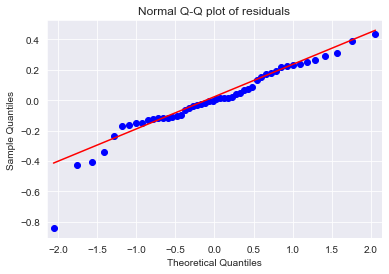

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [24]:
list(np.where(model.resid>0.3))


[array([12, 36, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

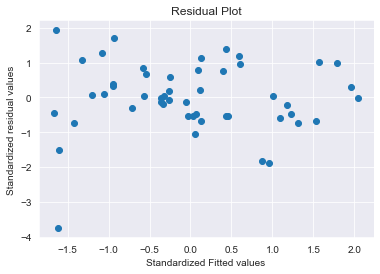

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

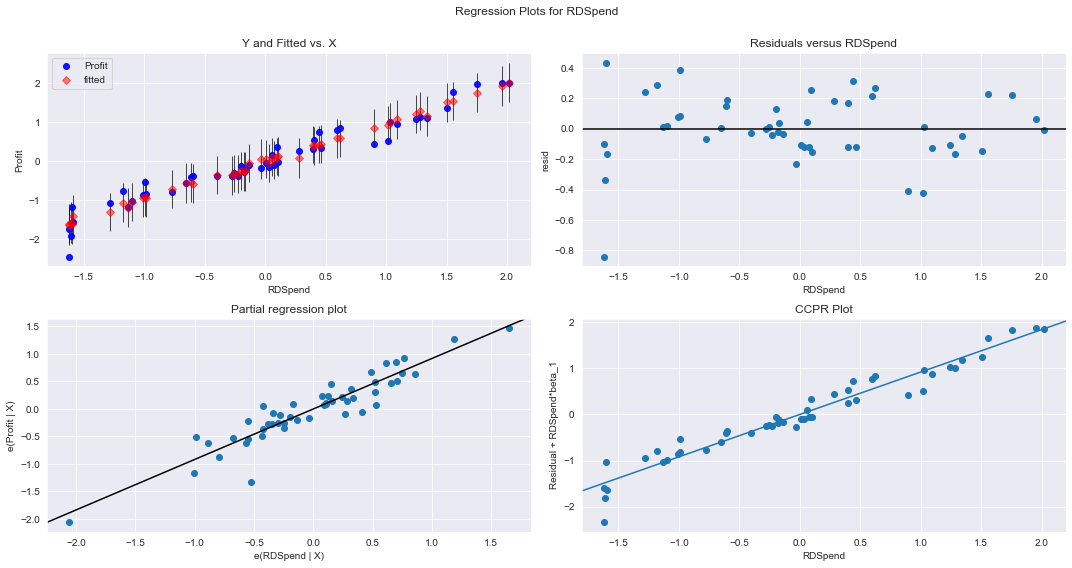

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

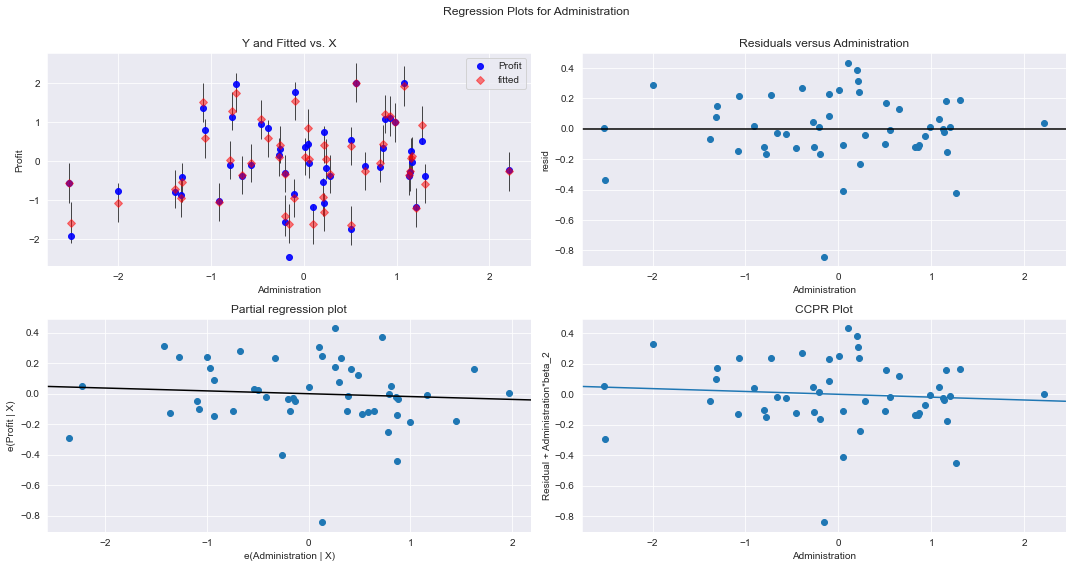

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

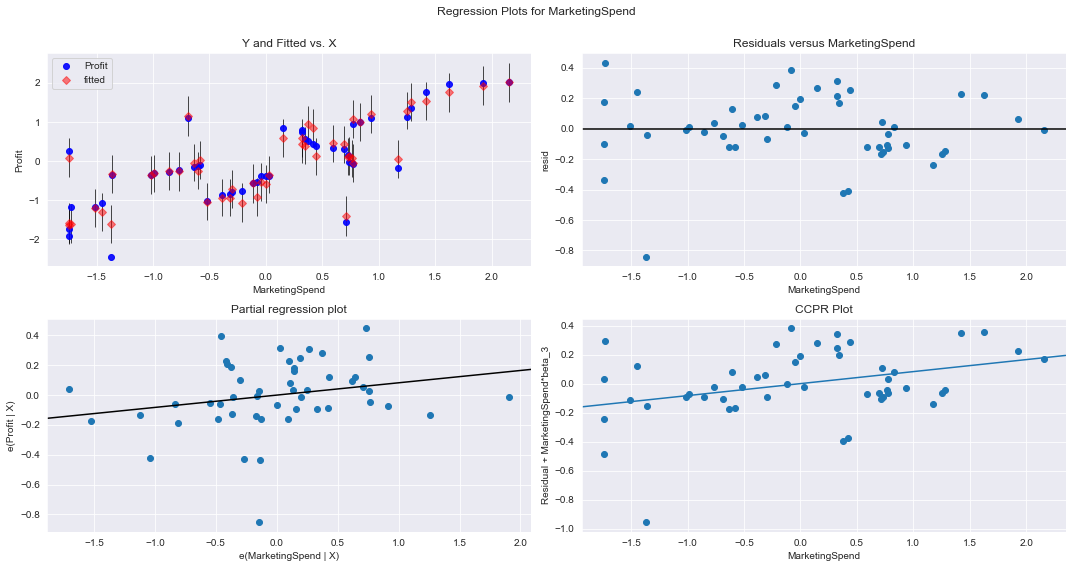

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "MarketingSpend", fig=fig)
plt.show()

# Cook’s Distance

In [31]:
model_influence = model.get_influence()
(c_V, _) = model_influence.cooks_distance

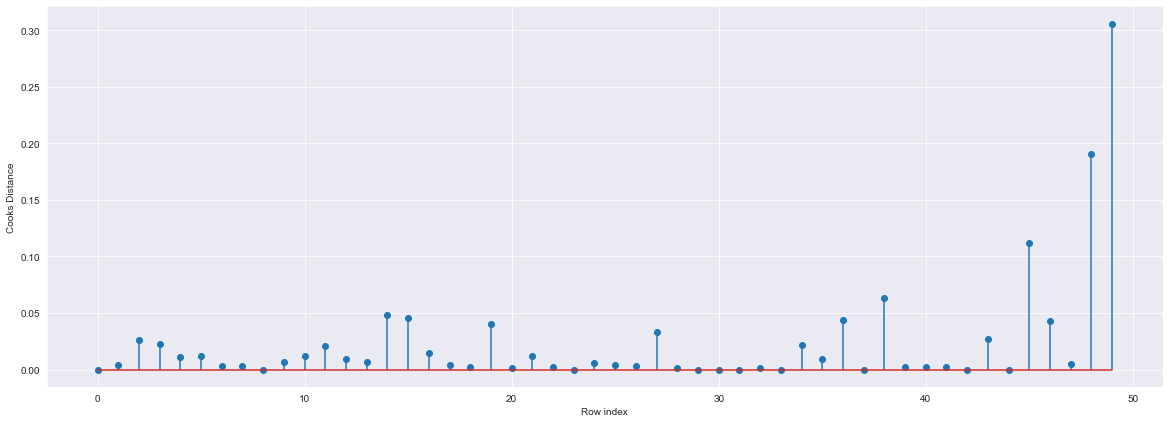

In [33]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(st)), np.round(c_V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(49, 0.30602819546993526)

# High Influence points 

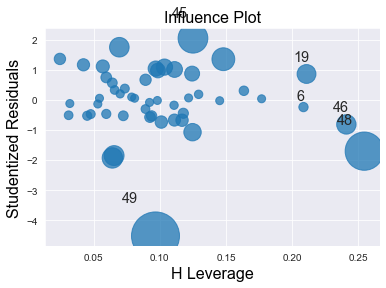

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
k = st.shape[1]
n = st.shape[0]
leverage_cutoff = 3*((k + 1)/n)

# Improving the model

In [37]:
#Load the data
startup_new = pd.read_csv("50_Startups.csv")


In [38]:
startup_new.columns = startup.columns.str.replace(' ','')
startup_new.head(2)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [39]:
startup_new.rename(columns={'R&DSpend':'RDSpend'},inplace=True)
startup_new.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup_new.drop(startup_new.index[[49]],axis=0).reset_index()

In [41]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)

In [42]:
startup1.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Build Model

In [43]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_st= smf.ols('Profit~RDSpend+MarketingSpend',data = startup1).fit()

In [44]:
(final_st.rsquared,final_st.aic)

(0.9610856807456628, 1018.8564801588338)

In [45]:
final_st= smf.ols('Profit~RDSpend+Administration',data = startup1).fit()

In [46]:
(final_st.rsquared,final_st.aic)

(0.9584519070123048, 1022.0654576388338)

# Cook’s Distance

In [47]:
model_influence_V = final_st.get_influence()
(c_V, _) = model_influence_V.cooks_distance

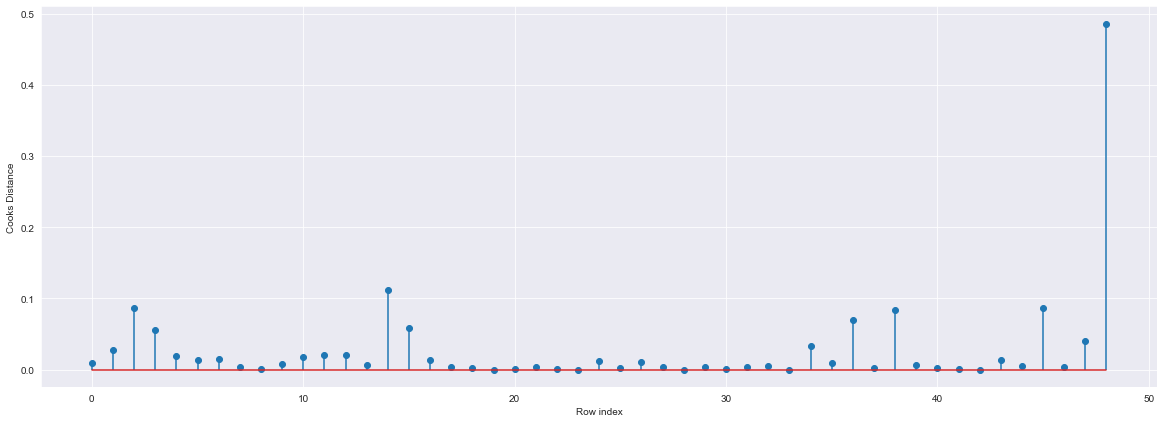

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
(np.argmax(c_V),np.max(c_V))

(48, 0.48584927508216796)

In [51]:
startup2=startup1.drop(startup1.index[[48]],axis=0)

In [53]:
startup2

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [55]:
final_ml_A= smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=startup2).fit()
final_ml_A

In [56]:
(final_ml_A.rsquared,final_ml_A.aic)


(0.9626766170294073, 994.6690439260116)

In [57]:
## predicting for new data

In [58]:
new_data=pd.DataFrame({'RDSpend':162597.70,"Administration":151377.59,"MarketingSpend":443898.53},index=[1])

In [60]:
model2.predict(new_data)

1    183045.472182
dtype: float64